In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('police.csv')

# Menampilkan 5 baris pertama dari DataFrame
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [12]:
gender_proportion = df['driver_gender'].value_counts(normalize=True)

# Tampilkan proporsi dengan nama kolom 'proportion'
gender_proportion = gender_proportion.rename_axis('driver_gender').reset_index(name='proportion')
gender_proportion = gender_proportion.set_index('driver_gender')['proportion']

print(gender_proportion)

driver_gender
M    0.72527
F    0.27473
Name: proportion, dtype: float64


In [13]:
# Hitung proporsi setiap jenis pelanggaran (violation) per jenis kelamin (driver_gender)
violation_proportion = (
    df.groupby('driver_gender')['violation']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
    .set_index(['driver_gender', 'violation'])
)

print(violation_proportion)

                                   proportion
driver_gender violation                      
F             Speeding               0.658114
              Moving violation       0.138218
              Equipment              0.105199
              Registration/plates    0.044418
              Other                  0.029738
              Seat belt              0.024312
M             Speeding               0.522243
              Moving violation       0.206144
              Equipment              0.134158
              Other                  0.058985
              Registration/plates    0.042175
              Seat belt              0.036296


C:\Users\rifky\AppData\Local\Temp\ipykernel_8380\616808761.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_time'] = pd.to_datetime(df['stop_time'], errors='coerce')


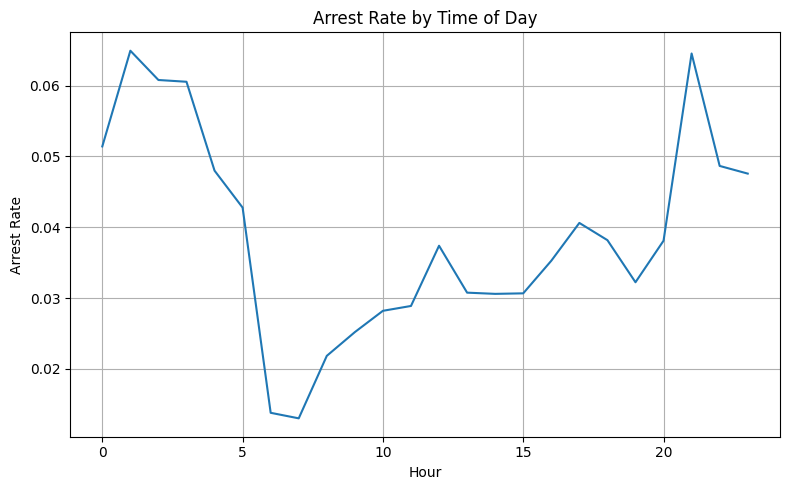

In [14]:
# Pastikan kolom 'stop_time' ada dan ubah ke datetime jika perlu
df['stop_time'] = pd.to_datetime(df['stop_time'], errors='coerce')

# Ambil jam dari waktu pemberhentian
df['hour'] = df['stop_time'].dt.hour

# Hitung arrest rate per jam
# Asumsikan ada kolom 'is_arrested' dengan nilai True/False
arrest_rate = df.groupby('hour')['is_arrested'].mean()

# Buat grafik
plt.figure(figsize=(8, 5))
arrest_rate.plot()
plt.title('Arrest Rate by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


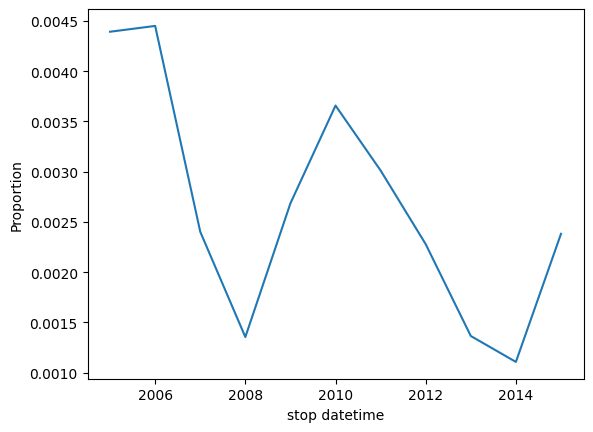

In [20]:
df = pd.read_csv("police.csv", parse_dates=['stop_date'])

# Buat kolom tahun
df['year'] = df['stop_date'].dt.year

# Hitung total stop per tahun
total_stops_per_year = df.groupby('year').size()

# Hitung jumlah penangkapan narkoba per tahun
drug_arrests = df[(df['is_arrested'] == True) & (df['drugs_related_stop'] == True)]
drug_arrests_per_year = drug_arrests.groupby('year').size()

# Hitung proporsi penangkapan narkoba dari total stop
drug_arrest_rate = (drug_arrests_per_year / total_stops_per_year).dropna()

# Plot
plt.plot(drug_arrest_rate.index, drug_arrest_rate.values)
plt.xlabel("stop datetime")
plt.ylabel("Proportion")
plt.show()

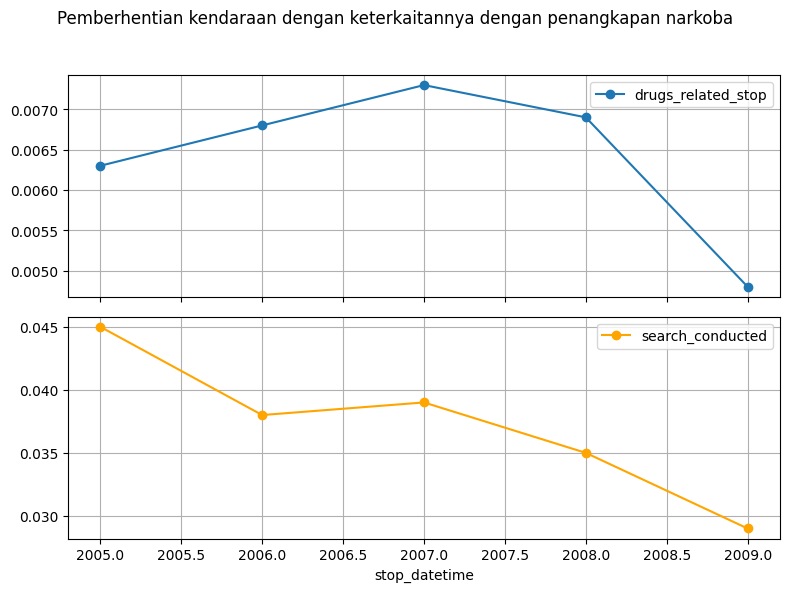

In [16]:
# Data
years = [2005, 2006, 2007, 2008, 2009]
drugs_related_stop = [0.0063, 0.0068, 0.0073, 0.0069, 0.0048]
search_conducted = [0.045, 0.038, 0.039, 0.035, 0.029]

# Buat subplot 2 baris
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Grafik 1: drugs_related_stop
axs[0].plot(years, drugs_related_stop, marker='o', label='drugs_related_stop')
axs[0].legend()
axs[0].grid(True)

# Grafik 2: search_conducted
axs[1].plot(years, search_conducted, color='orange', marker='o', label='search_conducted')
axs[1].legend()
axs[1].set_xlabel('stop_datetime')
axs[1].grid(True)

# Judul utama
fig.suptitle('Pemberhentian kendaraan dengan keterkaitannya dengan penangkapan narkoba')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


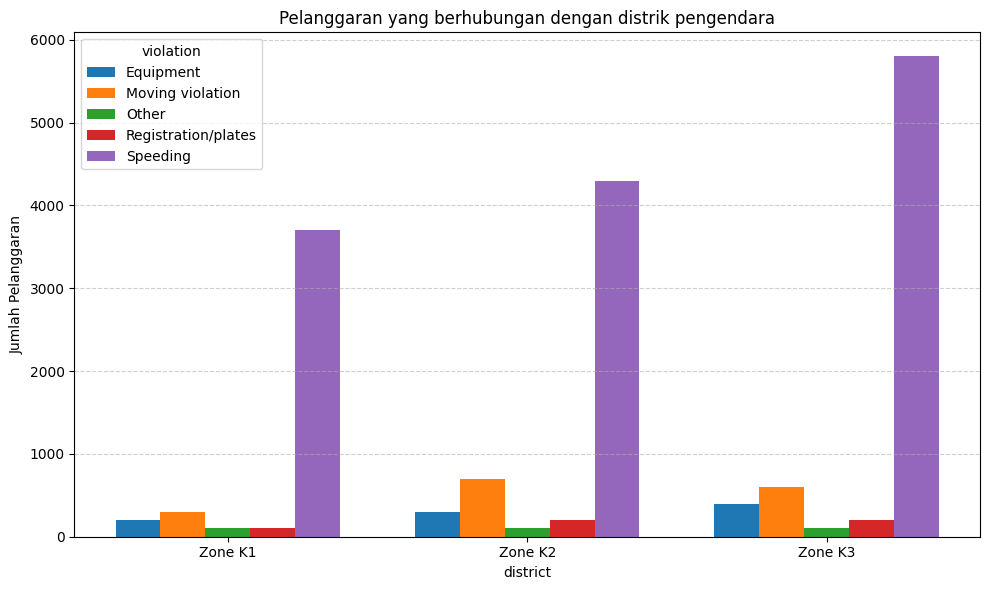

In [17]:
# Data
districts = ['Zone K1', 'Zone K2', 'Zone K3']
equipment = [200, 300, 400]
moving_violation = [300, 700, 600]
other = [100, 100, 100]
registration = [100, 200, 200]
speeding = [3700, 4300, 5800]

# Konversi ke numpy array
bar_width = 0.15
x = np.arange(len(districts))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 2*bar_width, equipment, width=bar_width, label='Equipment')
plt.bar(x - bar_width, moving_violation, width=bar_width, label='Moving violation')
plt.bar(x, other, width=bar_width, label='Other')
plt.bar(x + bar_width, registration, width=bar_width, label='Registration/plates')
plt.bar(x + 2*bar_width, speeding, width=bar_width, label='Speeding')

# Label dan Judul
plt.xticks(x, districts)
plt.xlabel('district')
plt.ylabel('Jumlah Pelanggaran')
plt.title('Pelanggaran yang berhubungan dengan distrik pengendara')
plt.legend(title='violation')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


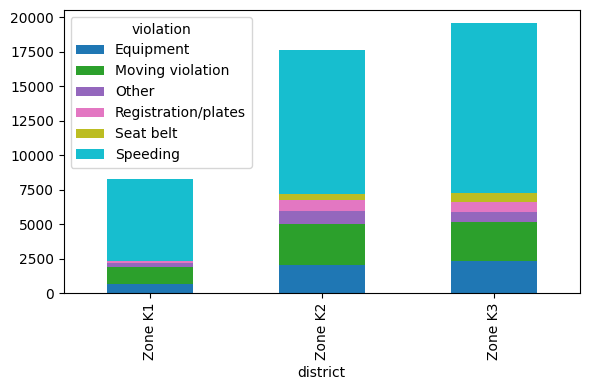

In [18]:
# Load data
df = pd.read_csv("police.csv")

# Filter hanya untuk distrik tertentu
filtered_df = df[df['district'].isin(['Zone K1', 'Zone K2', 'Zone K3'])]

# Hitung jumlah pelanggaran per jenis dan distrik
violation_counts = filtered_df.groupby(['district', 'violation']).size().unstack().fillna(0)

# Plot grafik
ax = violation_counts.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='tab10')
ax.set_xlabel('district')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
